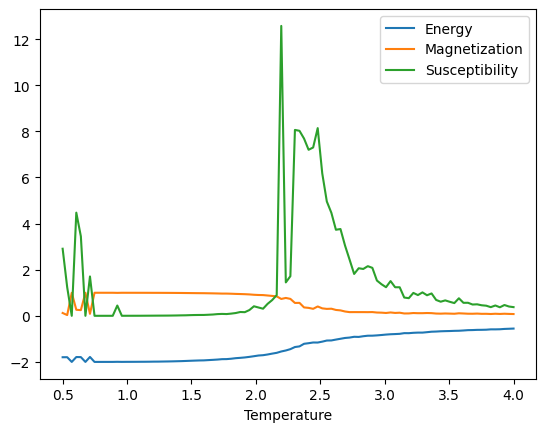

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 20  # lattice size
J = 1.0  # interaction energy
kB = 1.0  # Boltzmann constant
T_values = np.linspace(0.5, 4.0, 100)  # temperature values
n_steps = 1000  # number of Monte Carlo steps

# Initialize arrays to hold magnetization, energy, and susceptibility data
magnetization = np.zeros(T_values.shape)
energy = np.zeros(T_values.shape)
susceptibility = np.zeros(T_values.shape)

# Calculate the system energy
def calc_energy(spins):
    return -J * (spins * np.roll(spins, 1, axis=0) + spins * np.roll(spins, 1, axis=1)).sum()

# Calculate the system magnetization
def calc_magnetization(spins):
    return spins.sum()

# Metropolis algorithm
def metropolis(spins, beta):
    for _ in range(N * N):  # sweep over all spins
        # Select a random spin
        x, y = np.random.randint(0, N, 2)
        # Calculate the energy change for a spin flip
        deltaE = 2 * J * spins[x, y] * (spins[(x+1)%N, y] + spins[(x-1)%N, y] + spins[x, (y+1)%N] + spins[x, (y-1)%N])
        # Metropolis condition
        if deltaE < 0 or np.random.rand() < np.exp(-beta * deltaE):
            spins[x, y] *= -1
    return spins

# Monte Carlo simulation
for i, T in enumerate(T_values):
    beta = 1.0 / (kB * T)
    spins = 2 * np.random.randint(2, size=(N, N)) - 1  # initialize spins randomly
    M = np.zeros(n_steps)
    E = np.zeros(n_steps)

    # Thermalize
    for _ in range(n_steps):
        metropolis(spins, beta)

    # Measure
    for step in range(n_steps):
        metropolis(spins, beta)
        E[step] = calc_energy(spins)
        M[step] = calc_magnetization(spins)

    # Store average values
    magnetization[i] = np.abs(M).mean() / N**2
    energy[i] = E.mean() / N**2
    susceptibility[i] = (np.mean(M**2) - np.mean(np.abs(M))**2) / (N**2 * kB * T)

# Plot the results
plt.figure()
plt.plot(T_values, energy, label='Energy')
plt.plot(T_values, magnetization, label='Magnetization')
plt.plot(T_values, susceptibility, label='Susceptibility')
plt.legend()
plt.xlabel('Temperature')
plt.show()
